<a href="https://colab.research.google.com/github/KeertanPatro/Unsupervised/blob/main/Netflix_Movies_and_TV_shows_clustering_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1 -** Konapala Sai Keertan Patro


# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.   

In our project we first did bit of data wrangling to understand our dataset there are approximatly **7787 records and 12 attributes** in our dataset. We then did **Exploratory Data Analysis** to understand the nature of each of the attributes in our dataset, After that we handled our **missing values** and **outliers** in the dataset, and then we did text preprocessing.   

 In **text preprocessing** we have **combined the attributes cast, country, genre, director, rating, and description**  to create different clusters. **The TFIDF vectorizer** was used to tokenize, preprocess, and vectorize the values in these attributes. After TFIDF we have to reduce dimension as there were lot of features, problem of dimensionality was dealt with through the use of **Principal Component Analysis (PCA)**. USing PCA we have reduced 10,000 features to 3000 features which explains more than **80% of our variance**.   

We have used **Kmeans** and **Agglomerative clustering** techniques to form relevent clusters we have used techniques like the **elbow method**, **silhouette score** to determine optimal number of clusters in Kmeans, while we have used **dendrogram** to determine optimal number of clusters in agglomerative clustering, we have got **6 clusters for Kmeans** and **9 clusters for agglomerative clustering.**   

After doing clustering analysis, we have developed a **Content based recommender system** which will recommend top 10 similar movies or show based to the user's current movie choice. We have used **cosine similarity** to compute similarity score between two items.

# **GitHub Link -**

https://github.com/KeertanPatro/Unsupervised/blob/main/Netflix_Movies_and_TV_shows_clustering_final.ipynb

# **Problem Statement**


Netflix is a streaming service that offers a wide variety of television shows and movies for viewers to watch at their convenience. With a monthly subscription, users have access to a vast library of content, including original series and films produced by Netflix. The platform also allows users to create multiple profiles, making it easy for family members or roommates to have their own personalized viewing experience. Additionally, Netflix allows users to download content to watch offline, making it a great option for those who travel frequently or have limited internet access. Overall, Netflix is a convenient and cost-effective way to access a wide variety of entertainment.

As of 2022-Q2, more than 220 million people had signed up for Netflix's online streaming service, making it the largest OTT provider worldwide. To improve the user experience and prevent subscriber churn, they must efficiently cluster the shows hosted on their platform.

By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [138]:
# Import Libraries

# data wrangling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS

# text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA



# Model implementation for clustering and recommendation systems

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [139]:
plt.style.use('ggplot')

In [140]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [141]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix_clustering_unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [143]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [144]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [145]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [146]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [147]:
# Dataset Duplicate Value Count
df[df.duplicated()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

#### Missing Values/Null Values

In [148]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

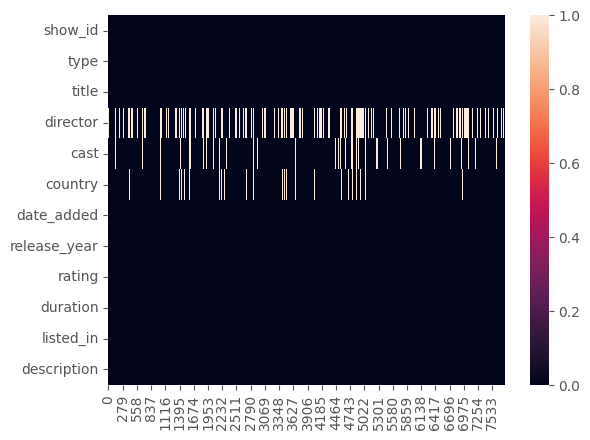

In [149]:
# Visualizing the missing values
sns.heatmap(df.isna().transpose())

### What did you know about your dataset?

*  There are 7787 observations and 12 columns.  
* There are some missing values found in column director,cast and country.  
* There are no duplicate values present in thid dataset.  
* The datatype of the most features are object.

## ***2. Understanding Your Variables***

In [150]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [151]:
# Dataset Describe
df.describe(include='object')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7280             7777   7780      7787           7787   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2555              118   2863      1608            334   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3

### Variables Description

**Show_id:** unique id foe each movie.  
**type:**    identifier(movie/TV show).   
**Title:**   Title of the movie/show.   
**director:**  Director of the show.   
**cast:**  actors involved.      
**country:**  Country of the  production.  
**date_added:** date it was added on netflix.   
**Year_release:**  Actual release year of the show.  
**ratings:**  TV ratings of the show.  
**duration:** Total duration in minutes or number of seasons.  
**listed_in:** Genre of the Movie/Show.   
**Description:** A brief description of the movie/show.  

### Check Unique Values for each variable.

In [152]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [153]:
# converting date_added column to date datatype
df['date_added']=pd.to_datetime(df['date_added'])


In [154]:
# adding month and year feature to our data
df['month_added']=df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year.convert_dtypes()

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
 12  month_added   7777 non-null   object        
 13  year_added    7777 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(11)
memory usage: 859.4+ KB


In [156]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description month_added  year_added  
0  In a future where the elite inhabit an island ...      August        2020  
1  After a devastating earthquake hits Mexico Cit...    December        2016  
2  When an army recruit is found dead, his fellow...    December        2018  
3  In a postapocalyptic world, rag-doll robots hi...    November        2017  
4  A brilliant group of students become card-coun...     January        2020

### What all manipulations have you done and insights you found?

I have changed date_added column into datetime format and extracted month and year from the feature.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Exploring motion picture categories.

In [157]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

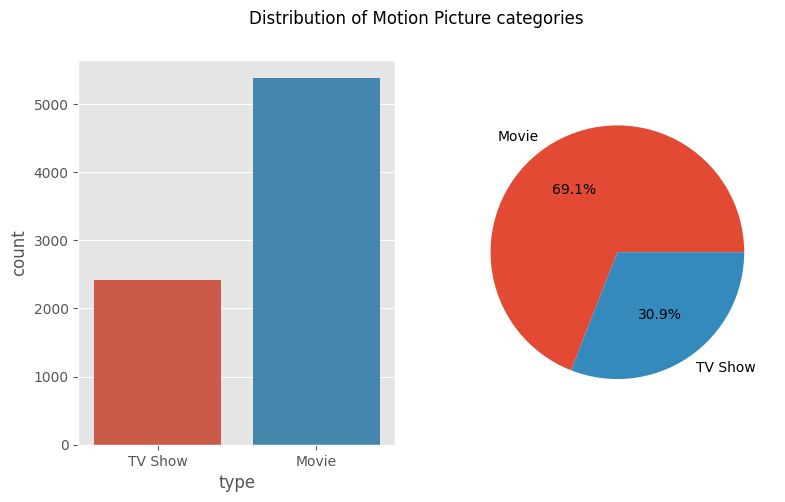

In [158]:
# different types of items
fig,ax=plt.subplots(1,2,figsize=(9,5))
sns.countplot(x='type',data=df,ax=ax[0])
ax[1].pie(df['type'].value_counts(),labels=['Movie','TV Show'],autopct='%.1f%%')
fig.suptitle('Distribution of Motion Picture categories')
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the distribution of movies and TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

We see that more movies than TV shows in our dataset, around 69% of the items are movies while 31% items are TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Top Directors

In [159]:
tv_directors=df[df['type']=='TV Show']['director'].str.split(', ').explode().value_counts(ascending=False)
movie_directors=df[df['type']=='Movie']['director'].str.split(', ').explode().value_counts(ascending=False)

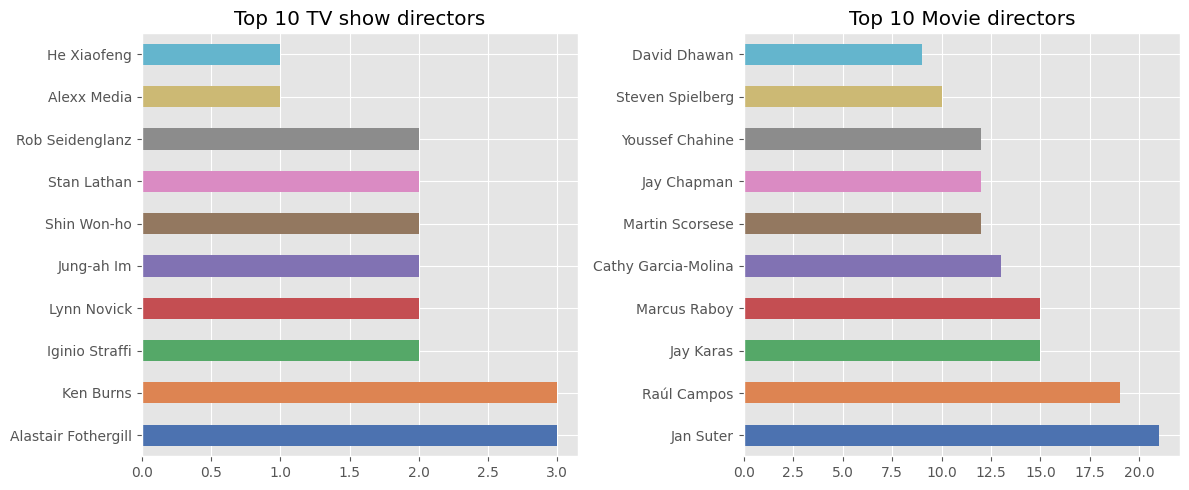

In [160]:
# visualizing top 10 directors
color=sns.color_palette('deep')
fig,ax=plt.subplots(1,2,figsize=(12,5))
tv_directors[:10].plot(kind='barh',ax=ax[0],color=color)
ax[0].set_title("Top 10 TV show directors")
movie_directors[:10].plot(kind='barh',ax=ax[1],color=color)
plt.tight_layout()
ax[1].set_title("Top 10 Movie directors")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into top 10 directors of both movies and TV show

##### 2. What is/are the insight(s) found from the chart?

*  The top TV show directors in netflix are Alastair Fothergill, Ken Burns having directed 3 and 2 netflix TV shows .  

*  The top directors in the netflix who have directed movies are Jan Suter, Raul Campos having directed 21 and 19 movies respectively.  

#### Top Casts

In [161]:
# Chart - 3 visualization code
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [162]:
# separating tv cast names
tv_cast_names=df[df['type']=='TV Show']['cast'].str.split(', ').explode().value_counts()

# separating movie cast names
movie_cast_names=df[df['type']=='Movie']['cast'].str.split(', ').explode().value_counts()


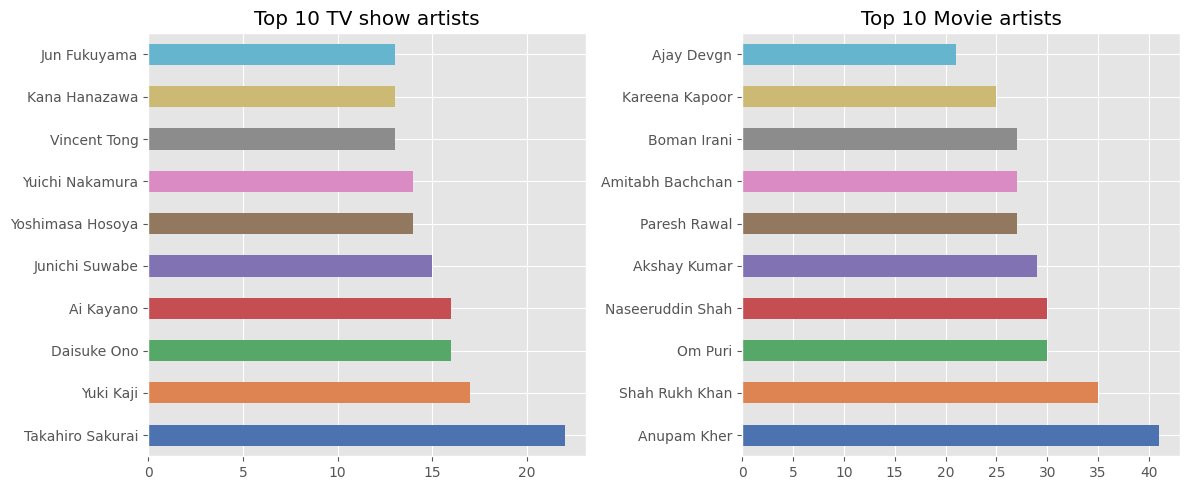

In [163]:
# Visualizing top casts
color=sns.color_palette('deep')
fig,ax=plt.subplots(1,2,figsize=(12,5))
tv_cast_names[:10].plot(kind='barh',ax=ax[0],color=color)
ax[0].set_title("Top 10 TV show artists")
movie_cast_names[:10].plot(kind='barh',ax=ax[1],color=color)
plt.tight_layout()
ax[1].set_title("Top 10 Movie artists")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into top artists in both tv as well as movies featuring in Netflix.

##### 2. What is/are the insight(s) found from the chart?

* The top artists featuring in Netflix TV shows are **Takahiro Sakurai** and **Yuki Kaji** featuring 23 and 17 shows respectively.  

* The top artists featuring in Netflix movies are **Anupam Kher** and Shah Rukh Khan featuring 40 and 35 movies respectively.  

#### Distribution of Pictures based on country

In [164]:
country_counts=df['country'].str.split(", ").explode()
country_counts=country_counts.value_counts()
country_counts.rename(index={'United States':'United States of America'},inplace=True)

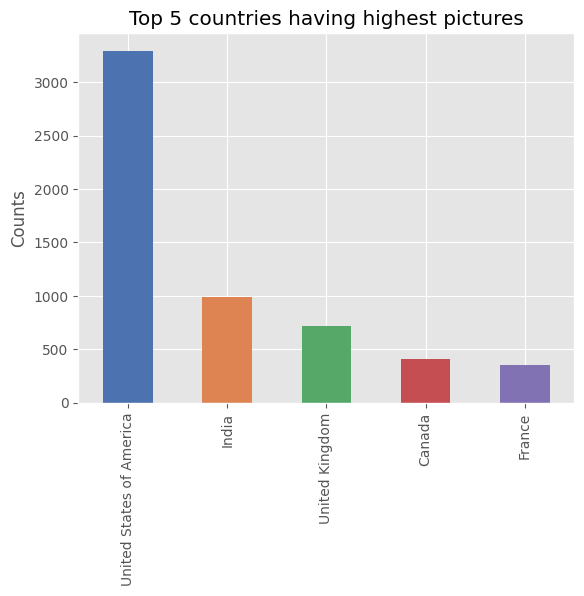

In [165]:
# top 5 countries
country_counts[:5].plot(kind='bar',color=color)
plt.title("Top 5 countries having highest pictures")
plt.ylabel('Counts')
plt.show()

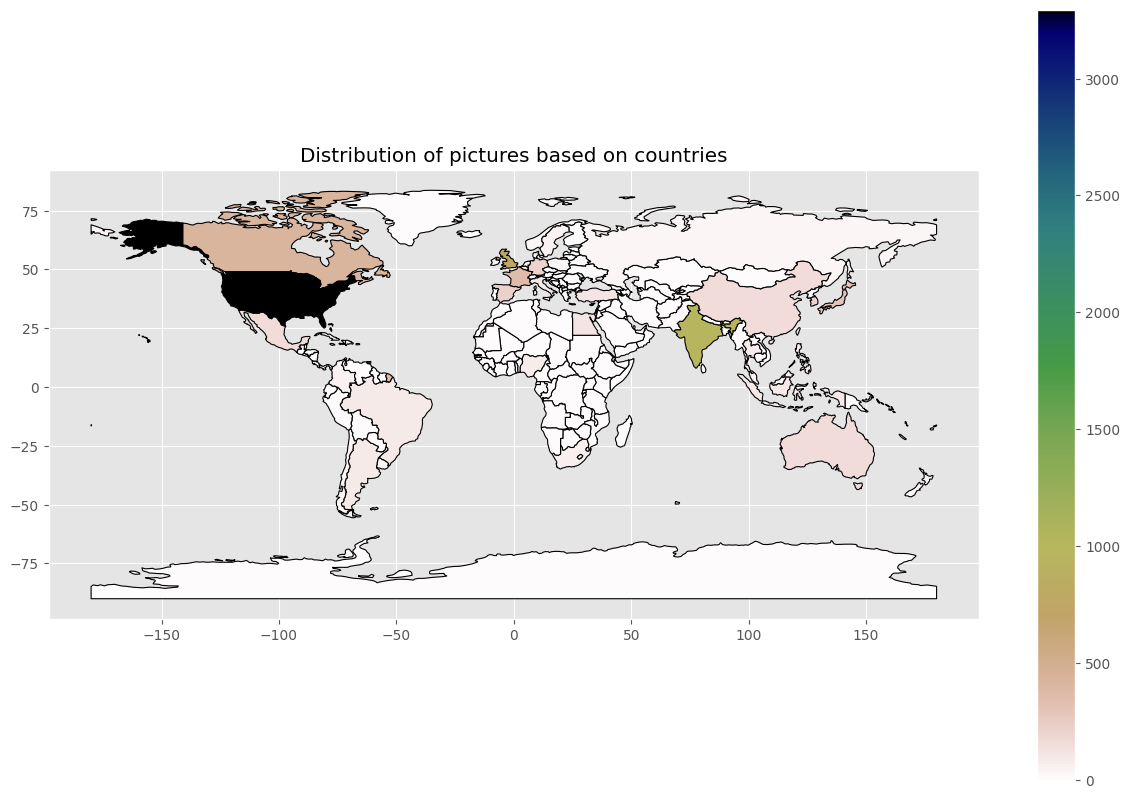

In [166]:
# Visualizing the distribution using world map
worldmap=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data=pd.merge(worldmap,country_counts,left_on='name',right_index=True,how='left')
merged_data.rename(columns={'country':'counts'},inplace=True)
merged_data['counts']=merged_data['counts'].fillna(0)

# plotting
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='counts', linewidth=0.8,edgecolor='black',ax=ax,legend=True,cmap='gist_earth_r')
plt.title('Distribution of pictures based on countries')
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to visualize distribution of movies/tv shows across various countries.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies or Tv shows are American, there are few Indian pictures followed by England, Canada and France.

#### Analyzing Titles of the Picture

In [167]:
df['title'].tail()

7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, dtype: object

In [168]:
text=' '.join(title for title in df['title'] )
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

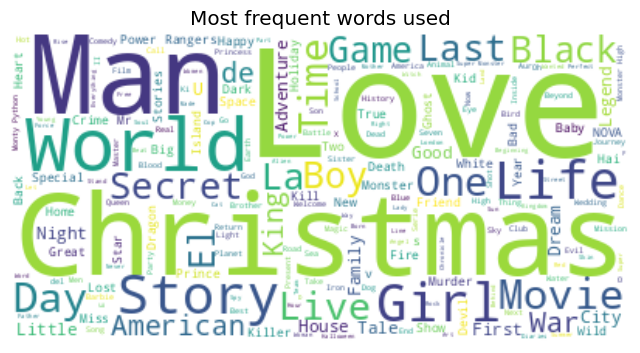

In [169]:
# visualizing most frequent words
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words used")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see what are the frequent words used in the Movie/TV Show title for this dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we find that the most frequent words used in the dataset are **Love, World, Christmas, Man** etc. So we can expect that movies are based on Love, Christmas and so on.

#### Release year of the Picture

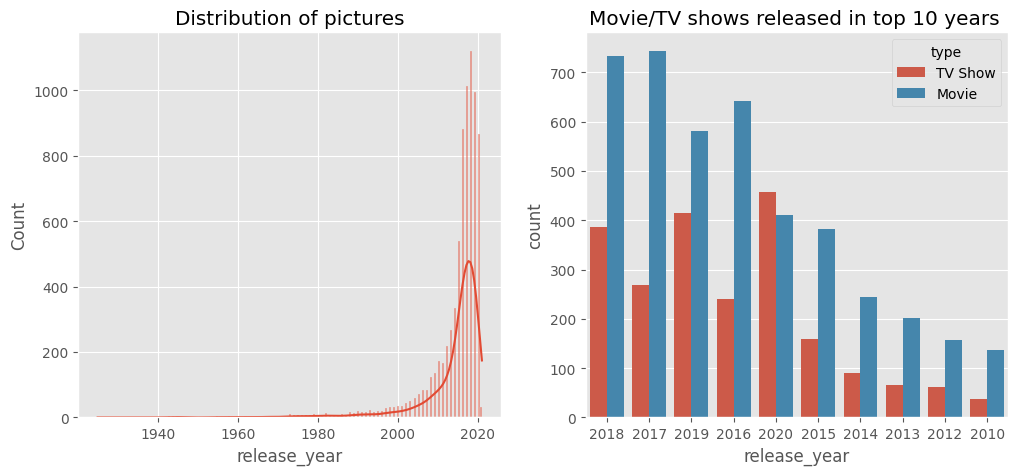

In [170]:
# Distribution of pictures based on release year
fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df['release_year'],kde=True,ax=ax[0])
ax[0].set_title("Distribution of pictures")
sns.countplot(x='release_year',hue='type',order=df['release_year'].value_counts()[:10].index,data=df,ax=ax[1])
ax[1].set_title("Movie/TV shows released in top 10 years ")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into distribution of Netflix movies and TV shows based on year.

##### 2. What is/are the insight(s) found from the chart?

We find that this Netflix primarily contains movies which are released in the year **2018, 2017, 2019, 2016, 2020**. There are very few old movies.

###**Ratings**

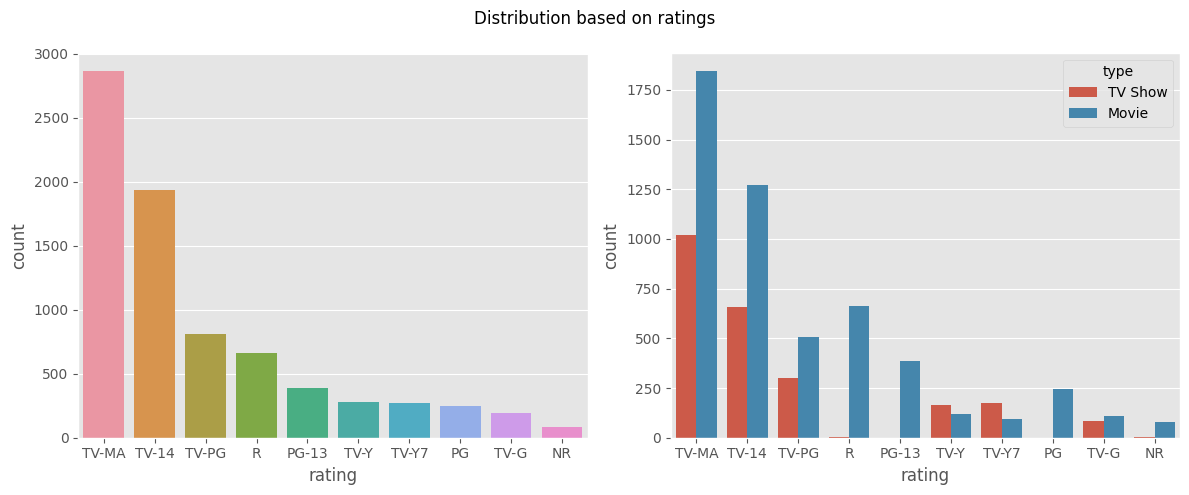

In [171]:
# Distribution based on ratings

fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='rating',data=df,ax=ax[0],order=df['rating'].value_counts().index[:10])
sns.countplot(x='rating',hue='type',order=df['rating'].value_counts().index[:10],data=df,ax=ax[1])
fig.suptitle("Distribution based on ratings")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the rating distribution to our movies/tv shows in Netflix to understand for which audience this dataset belongs to.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we see that most of the pictures have ratings like **TV-MA, TV-14, TV-PG, which suggest that these shows are for mature audience**, and very few picture are meant for the kids.

#### **Movies/ TV show based on Generes.**

In [172]:
mov_genres=df.loc[df['type']=='Movie']['listed_in'].str.split(", ").explode()

tv_genres=df.loc[df['type']=='TV Show']['listed_in'].str.split(", ").explode()
tv_genres

0             International TV Shows
0                          TV Dramas
0                TV Sci-Fi & Fantasy
5             International TV Shows
5                          TV Dramas
                    ...             
7779          International TV Shows
7779       Spanish-Language TV Shows
7779    Stand-Up Comedy & Talk Shows
7785          International TV Shows
7785                      Reality TV
Name: listed_in, Length: 5525, dtype: object

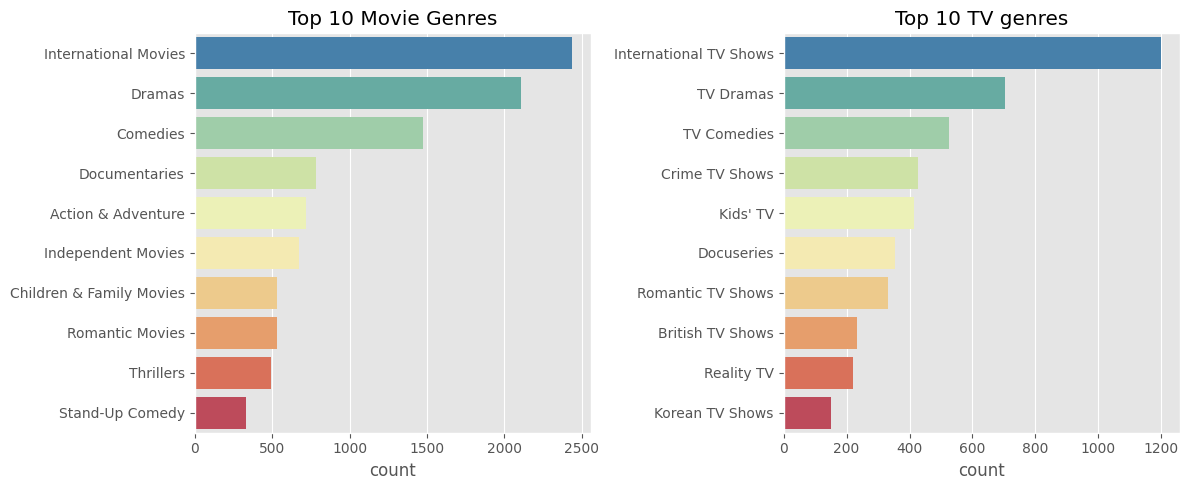

In [173]:
# visualizing top genres for movie and tv shows
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(y=mov_genres,order=mov_genres.value_counts().index[:10],palette='Spectral_r',ax=ax[0])
ax[0].set_title("Top 10 Movie Genres")
ax[0].set_ylabel("")
sns.countplot(y=tv_genres,order=tv_genres.value_counts().index[:10],palette='Spectral_r',ax=ax[1])
ax[1].set_title("Top 10 TV genres")
ax[1].set_ylabel("")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see what are the top genres for Movies and TV shows that people prefer.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we find that people in genral like **international movies and shows followed by drama and comedy.**

#### **Analyzing description of Movies and Tv shows**

In [174]:
text=' '.join(words for words in df['description'] )
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

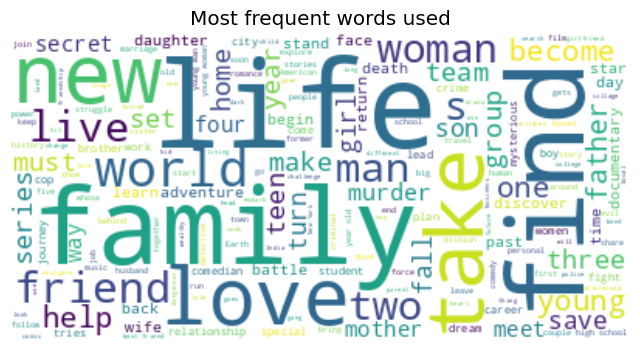

In [175]:
# visualizing most frequent words

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words used")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the most frequent used in the decription of a movie or tv show.

##### 2. What is/are the insight(s) found from the chart?

The most frequent words are **family, friend, life, love, world**  etc. This suggests that plot of the majority movie or tv show might revolve around family, friend, life, love, world.

## ***5. Feature Engineering & Data Pre-processing***

In [176]:
# creating copy
netflix_df=df.copy()

### 1. Handling Missing Values

In [177]:
# Handling Missing Values & Missing Value Imputation
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
month_added       10
year_added        10
dtype: int64

We see lot of missing values in column director, cast, country.

In [178]:
# handling missing values in director, cast, country
netflix_df[['director','cast','country']]=netflix_df[['director','cast','country']].fillna('')

# dropping missing values in date_added release_year
netflix_df=netflix_df.dropna(subset=['date_added','rating'])

In [179]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have replaced the missing value in director, cast, country as unknown and we have dropped the missing values in date_added and ratings.

### 2. Handling Outliers

In [180]:
# let us look at our numerical columns
num_col=df.describe().columns
num_col


Index(['release_year', 'year_added'], dtype='object')

In [181]:
df['year_added']

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: year_added, Length: 7787, dtype: Int64

Text(0.5, 0.98, 'Outliers in numeric columns')

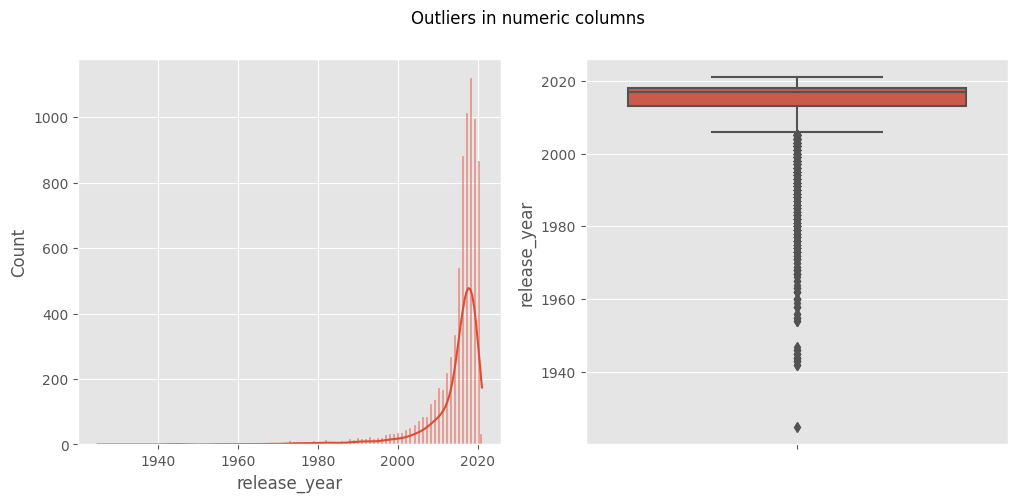

In [182]:
# plotting these two numeric variables
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["release_year"],kde=True,ax=ax[0])
sns.boxplot(y=df['release_year'],ax=ax[1])
fig.suptitle("Outliers in numeric columns")


##### What all outlier treatment techniques have you used and why did you use those techniques?

Since there are only two numeric columns, rest are text data, and we won't need the numeric data for our clustering analysis, so we let the outliers be as it is.

### 3. Categorical Encoding

In [183]:
# Encode your categorical columns
ratings = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
netflix_df['rating']=netflix_df['rating'].map(ratings)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have decoded the ratings into very simple classification so that it would be easy to segment the movies and tv shows.

### 4. **Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [184]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'year_added'],
      dtype='object')

In [185]:
netflix_df['director'].head()

0                     
1    Jorge Michel Grau
2         Gilbert Chan
3          Shane Acker
4       Robert Luketic
Name: director, dtype: object

In [186]:
# merging the sub-names of the director to form a single string

def director_merge(name):
  merge_name=[]
  for word in name.split(" "):
    merge_name.append(word)
  merge_name=''.join(merge_name)
  return merge_name

netflix_df['director']=netflix_df['director'].apply(director_merge)

In [187]:
netflix_df['director'].head()

0                   
1    JorgeMichelGrau
2        GilbertChan
3         ShaneAcker
4      RobertLuketic
Name: director, dtype: object

In [188]:
netflix_df['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

In [189]:
# similary merging the individual artists name to form a single string for a unique artist

def merging_names(text):
  new_text=[]
  for name in text.split(', '):
    new_name=name.replace(" ","")
    new_text.append(new_name)
  new_text=", ".join(new_text)
  return new_text
merging_names(netflix_df['cast'][0])
netflix_df['cast']=netflix_df['cast'].apply(merging_names)
netflix_df['cast'].head()

0    JoãoMiguel, BiancaComparato, MichelGomes, Rodo...
1    DemiánBichir, HéctorBonilla, OscarSerrano, Aza...
2    TeddChan, StellaChung, HenleyHii, LawrenceKoh,...
3    ElijahWood, JohnC.Reilly, JenniferConnelly, Ch...
4    JimSturgess, KevinSpacey, KateBosworth, AaronY...
Name: cast, dtype: object

#### 1. Expand Contraction

In [190]:
# combining all the relevent text features which is necessary for clustering analysis

netflix_df['combined_text']=netflix_df['director']+' '+ netflix_df['cast']+ " "+ netflix_df['rating']+ ' ' \
                                 +netflix_df['listed_in']+ ' ' + netflix_df['description']

In [191]:
netflix_df['combined_text'][0]

' JoãoMiguel, BiancaComparato, MichelGomes, RodolfoValente, VanezaOliveira, RafaelLozano, VivianePorto, MelFronckowiak, SergioMamberti, ZezéMotta, CelsoFrateschi Adults International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 2. Lower Casing

In [192]:
# Lower Casing
def lower_casing(text):
  text=text.lower()
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(lower_casing)

#### 3. Removing Punctuations

In [193]:
# Remove Punctuations
def remove_punctuations(text):
  text=re.sub(r'[^\w\s]','',text)
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words which contain digits

In [194]:
# Remove URLs & Remove words and digits contain digits
def remove_url(text):
  text=re.sub(r'https?\S+|www\S+','',text) # removing urls
  text=re.sub(r'\w*\d+\w*','',text) # removing words which contain digits
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(remove_url)

In [195]:
netflix_df['combined_text'][0]

' joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor'

#### 5. Removing Stopwords

In [196]:

nltk.download('stopwords')
sw=stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [197]:
# Remove Stopwords
def remove_stopwords(text):
  new_text=[words for words in text.split() if words not in sw]
  new_text=' '.join(new_text)
  return new_text
netflix_df['combined_text']= netflix_df['combined_text'].apply(remove_stopwords)
netflix_df['combined_text'][0]

'joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv shows tv dramas tv scifi fantasy future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Lemmatization

In [198]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [199]:
def lemmatizer(text):
  lemmatizer=WordNetLemmatizer()
  lemmas=[]
  for word in text.split():
    lemma=lemmatizer.lemmatize(word,pos='v')
    lemmas.append(lemma)
  new_text=' '.join(lemmas)
  return new_text
netflix_df['combined_text']=netflix_df['combined_text'].apply(lemmatizer)


In [200]:
netflix_df['combined_text'][0]

'joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv show tv dramas tv scifi fantasy future elite inhabit island paradise far crowd slum get one chance join save squalor'

**The following steps we have done above for text preprocessing are:**  
**Step-1:** We combine all the relevent text features in the dataset into new feature called **combined_text**.    
**Step-2:** We convert all the upper cases in combined_text to lower case.  
**Step-3:** We remove all punctuations present in combined_text.  
**Step-4:** We remove all URL's and words which contain digits.  
**Step-5:** We remove all the Stopwords in the combined_text.  
**Step-6:** We do Lemmatization on combined_text this converts all the synonyms of a word into one root word.

#### 7. Tokenization

In [201]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [202]:
tokenized_data=netflix_df['combined_text'].copy()

In [203]:
# Tokenization
tokenized_data=tokenized_data.apply(word_tokenize)
tokenized_data[45]

['alicanyücesoy',
 'melisasözen',
 'musauzunlar',
 'serkanercan',
 'özkanuğur',
 'ülküduru',
 'tansubiçer',
 'nadirsarıbacak',
 'sermetyeşil',
 'ayhankavas',
 'adults',
 'crime',
 'tv',
 'show',
 'international',
 'tv',
 'show',
 'tv',
 'dramas',
 'orphan',
 'subject',
 'test',
 'give',
 'superpowers',
 'rescue',
 'raise',
 'istanbuls',
 'streets',
 'fall',
 'reporter',
 'link',
 'past']

In [204]:
tokenized_data[0]

['joãomiguel',
 'biancacomparato',
 'michelgomes',
 'rodolfovalente',
 'vanezaoliveira',
 'rafaellozano',
 'vivianeporto',
 'melfronckowiak',
 'sergiomamberti',
 'zezémotta',
 'celsofrateschi',
 'adults',
 'international',
 'tv',
 'show',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasy',
 'future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowd',
 'slum',
 'get',
 'one',
 'chance',
 'join',
 'save',
 'squalor']

#### 8. Text Vectorization

In [205]:
# TF-IDF

vectorizer = TfidfVectorizer(lowercase=False,max_features=10000)
X = vectorizer.fit_transform(netflix_df['combined_text'])

In [206]:
X=X.toarray()

In [207]:
vectorizer.get_feature_names_out()[:30]

array(['aakashdabhade', 'aamirbashir', 'aamirkhan', 'aaron',
       'aaronabrams', 'aaronburns', 'aarondouglas', 'aaroneckhart',
       'aaronjeffery', 'aaronpaul', 'aarontaylorjohnson', 'aaronyan',
       'aaronyoo', 'aashishchaudhary', 'aasifmandvi', 'abandon',
       'abbasalibhaiburmawallamastanalibhaiburmawalla', 'abbey',
       'abbiecornish', 'abbydonnelly', 'abbytrott', 'abdalahmishrif',
       'abdelaziznmila', 'abdelilahwahbi', 'abduct', 'abduction',
       'abhaydeol', 'abhimanyusingh', 'abhishekbachchan',
       'abigailbreslin'], dtype=object)

##### Which text vectorization technique have you used and why?

Here we have used TF-IDF vectorization technique, it is the best technique as it gives more importance to less frequent words, and less importance to high frequent words.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimension reduction is needed as there are **more than 20000 features** and when we do clustering analysis of this many dimensions our program would crash.

In [208]:
# DImensionality Reduction (If needed)

pca=PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)


[1.47507829e-02 6.26262828e-03 5.68458535e-03 ... 7.45164887e-35
 6.87506576e-35 6.43302622e-35]


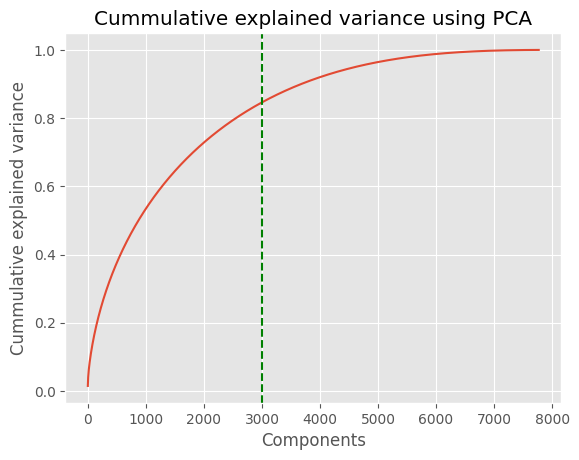

In [209]:
# plotting to see explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=3000,color='g',linestyle='--')
plt.xlabel("Components")
plt.ylabel("Cummulative explained variance")
plt.title("Cummulative explained variance using PCA")
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA to reduce the dimension of the dataset, from the above plot we find that about 3000 components could explain about 80% of the variance.

In [210]:
# using pca to reduce dimensions
pca=PCA(n_components=3000, random_state=0)
X_pca=pca.fit_transform(X)

In [212]:
X_pca.shape

(7770, 3000)

## ***6. ML Model Implementation***

###**K Means**

In [213]:

# Elbow method to determine the best value of n_clusters

sse=[]
for k in range(1,16):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(X_pca)
  sse.append(kmeans.inertia_)



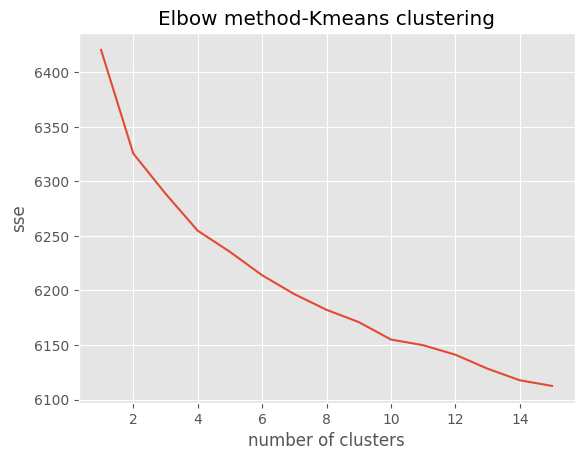

In [214]:
# plotting sse to find optimal k value
plt.plot(range(1,16),sse)
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.title("Elbow method-Kmeans clustering")
plt.show()

From the above plot we see that as number of clusters increases the sse value decreases, it is difficult to point out the elbow from the above curve. We need a better method to find out the best value of number of clusters.

In [215]:
# silhoutte method to find best value of k
sil_score=[]
for k in range(2,16):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(X_pca)
  label=kmeans.labels_
  sil_score.append(silhouette_score(X_pca, label))


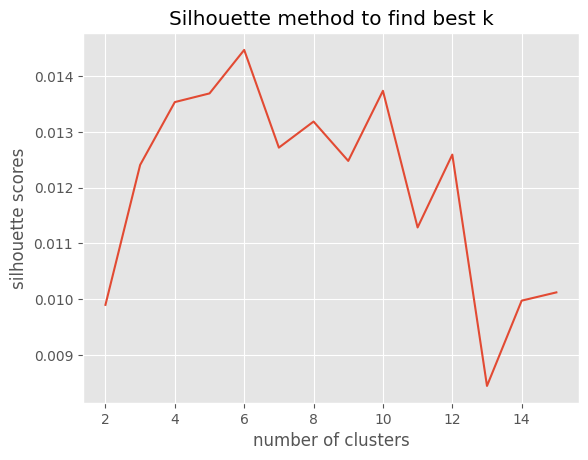

In [216]:
# plotting silhouette scores for different clusters
plt.plot(range(2,16),sil_score)
plt.xlabel('number of clusters')
plt.ylabel('silhouette scores')
plt.title('Silhouette method to find best k')
plt.show()

The number of clusters is determined for which silhouette score is maximum, from the above plot we find that the silhouette score is maximum for k=6, hence the number of clusters which we should choose for this problem is 6.

In [217]:
# clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans.fit(X_pca)

KMeans(n_clusters=6, random_state=0)

In [218]:
# evaluation metric
kmeans_sse = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

In [219]:
print("sse for 6 clusters is:",kmeans_sse)
print("silhouette_score for 6 clusters is",kmeans_silhouette_score)

sse for 6 clusters is: 6213.976191049532
silhouette_score for 6 clusters is 0.014467557210595037


In [220]:
# labelling the dataset
kmeans.labels_
netflix_df['clustering_label']=kmeans.labels_
netflix_df.sample(5)

show_id     type                          title         director  \
4425   s4426    Movie  Natsamrat - Asa Nat Hone Nahi  MaheshManjrekar   
6403   s6404  TV Show             The Good Detective                    
46       s47    Movie               1 Chance 2 Dance        AdamDeyoe   
7057   s7058    Movie             Thong Dee Fun Khao     BinBunluerit   
3757   s3758    Movie                 Love In A Puff    PangHo-cheung   

                                                   cast        country  \
4425  NanaPatekar, MedhaManjrekar, MrinmayeeDeshpand...          India   
6403    SonHyun-joo, JangSeung-jo, LeeElijah, OhJung-se    South Korea   
46    LexiGiovagnoli, JustinRay, RaeLatt, PoonamBasu...  United States   
7057  BuakawBanchamek, SornsinManeewan, PhutharitPro...       Thailand   
3757  MiriamChinWahYeung, ShawnYue, SinghHartihanBit...      Hong Kong   

     date_added  release_year        rating  duration  \
4425 2018-06-01          2016  Young Adults   165 min   
6403 2020-11-01          2020        Adults  1 Season   
46   2017-07-01          2014    Older Kids    89 min   
7057 2018-01-15          2017        Adults   122 min   
3757 2018-08-01          2010        Adults   103 min   

                                              listed_in  \
4425                       Dramas, International Movies   
6403  Crime TV Shows, International TV Shows, TV Dramas   
46                              Dramas, Romantic Movies   
7057  Action & Adventure, International Movies, Spor...   
3757             Comedies, Dramas, International Movies   

                                            description month_added  \
4425  A veteran Shakespearean actor steps off the st...        June   
6403  When doubts rise about a five-year-old murder ...    November   
46    When an aspiring dancer is uprooted during her...        July   
7057  After losing a boxing match, a talented Muay T...     January   
3757  When the Hong Kong government enacts a ban on ...      August   

      year_added                                      combined_text  \
4425        2018  maheshmanjrekar nanapatekar medhamanjrekar mri...   
6403        2020  sonhyunjoo jangseungjo leeelijah ohjungse adul...   
46          2017  adamdeyoe lexigiovagnoli justinray raelatt poo...   
7057        2018  binbunluerit buakawbanchamek sornsinmaneewan p...   
3757        2018  panghocheung miriamchinwahyeung shawnyue singh...   

      clustering_label  
4425                 1  
6403                 5  
46                   0  
7057                 3  
3757                 1

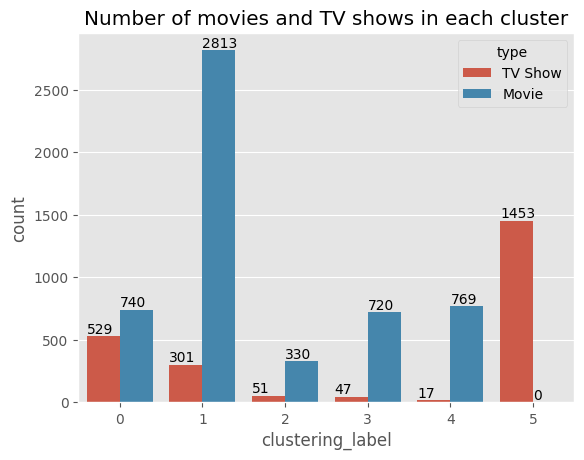

In [221]:
# visualizing cluster distribution
bars=sns.countplot(x='clustering_label',data=netflix_df,hue='type')
plt.title("Number of movies and TV shows in each cluster")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 25, format(yval,'.0f'))

#### **Analyzing key content present in clusters.**

In [222]:
def kmeans_wordcloud(cluster_num):
  content_df=netflix_df[netflix_df['clustering_label']==cluster_num]['description']
  description_words=[]
  for text in content_df:
    for words in text.split():
      description_words.append(words)

  new_text=' '.join(description_words)
  word_cloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(new_text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


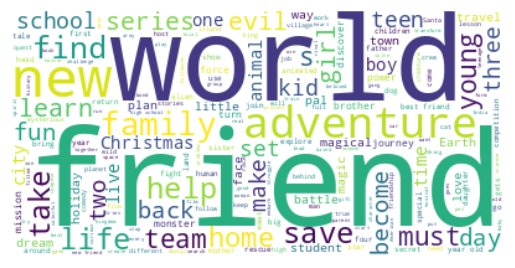

In [223]:
# key content in cluster 0
kmeans_wordcloud(0)

In [224]:
netflix_df[netflix_df['clustering_label']==0].sample(8)[['title','rating','listed_in']]

title      rating  \
6082                             The Andy Griffith Show        Kids   
3561                             LeapFrog: Phonics Farm        Kids   
266                                  Aajcha Divas Majha  Older Kids   
735                        Barbie Dreamhouse Adventures        Kids   
1886             DTC Yukemuri Junjo Hen From High & Low  Older Kids   
1247           Cats & Dogs: The Revenge of Kitty Galore  Older Kids   
836                    Benji's Very Own Christmas Story        Kids   
488   An American Tail: The Treasures of Manhattan I...        Kids   

                                   listed_in  
6082          Classic & Cult TV, TV Comedies  
3561                                  Movies  
266   Comedies, Dramas, International Movies  
735                                 Kids' TV  
1886            Dramas, International Movies  
1247      Children & Family Movies, Comedies  
836                 Children & Family Movies  
488                 Children & Family Movies

From the above wordcloud for cluster 0, we see that frequent words include words like **friend, world, new, adventure, kid, etc.** We also looked into the ratings and genre of the movies and shows which belong to cluster 0, from these two we can conclude that **most of the movies and shows in this cluster are for kids.**

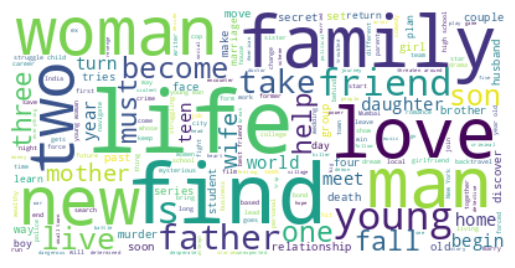

In [225]:
# key content in cluster 1
kmeans_wordcloud(1)

In [226]:
netflix_df[netflix_df['clustering_label']==1].sample(8)[['title','rating','listed_in']]

title        rating  \
888       Bhavesh Joshi Superhero  Young Adults   
2860         Hum Saath-Saath Hain          Kids   
2854                   Hridaynath  Young Adults   
7570  What's Eating Gilbert Grape         Teens   
6611           The Long Dumb Road        Adults   
3380          Kill Me If You Dare  Young Adults   
7546     What a Wonderful Family!  Young Adults   
3749            Love Beats Rhymes        Adults   

                                            listed_in  
888    Dramas, International Movies, Sci-Fi & Fantasy  
2860   Dramas, International Movies, Music & Musicals  
2854                     Dramas, International Movies  
7570       Classic Movies, Dramas, Independent Movies  
6611                     Comedies, Independent Movies  
3380  Comedies, International Movies, Romantic Movies  
7546           Comedies, Dramas, International Movies  
3749                          Dramas, Romantic Movies

From the above wordcloud for cluster 1, we see that frequent words include words like **life, find, family, love, men, women.** We also looked into the ratings and genre of the movies and shows which belong to cluster 1, from these two and wordcloud we can conclude that **most of the movies and shows in this cluster are dramas, thrillers and horrors.**

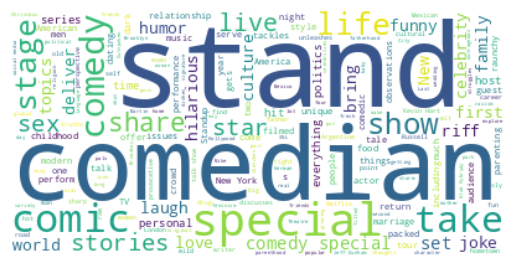

In [227]:
# key content in cluster 2
kmeans_wordcloud(2)

In [228]:
netflix_df[netflix_df['clustering_label']==2].sample(8)[['title','rating','listed_in']]

title        rating  \
3885      Malena Pichot: Estupidez compleja        Adults   
915                    Bill Burr: Let It Go        Adults   
4231          Moshe Kasher: Live in Oakland        Adults   
4328                       My Life My Story  Young Adults   
2922                        I'm Brent Morin        Adults   
1918                Eddie Murphy: Delirious        Adults   
4071  Michelle Buteau: Welcome to Buteaupia        Adults   
578            Ari Shaffir: Double Negative        Adults   

                                              listed_in  
3885                                    Stand-Up Comedy  
915                                     Stand-Up Comedy  
4231                                    Stand-Up Comedy  
4328  International TV Shows, Stand-Up Comedy & Talk...  
2922                                    Stand-Up Comedy  
1918                                    Stand-Up Comedy  
4071                                    Stand-Up Comedy  
578                        Stand-Up Comedy & Talk Shows

From the above wordcloud for cluster 2, we see that frequent words include words like **Comedy and stand.** We also looked into the ratings and genre of the movies and shows which belong to cluster 2, from these two and wordcloud we can conclude that **most of the movies and shows are comedy and stand up comedy shows**

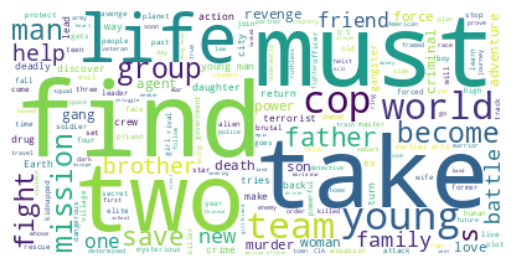

In [229]:
# key content in cluster 3
kmeans_wordcloud(3)

In [230]:
netflix_df[netflix_df['clustering_label']==3].sample(8)[['title','rating','listed_in']]

title        rating  \
2399                            Ghost Rider         Teens   
4150                       Mission of Honor        Adults   
6578  The Legacy of a Whitetail Deer Hunter  Young Adults   
7454                       Waarrior Savitri  Young Adults   
4380                           Naam Shabana  Young Adults   
4404                                 Naruto  Young Adults   
3549                                Lawless        Adults   
6183                     The Brothers Grimm         Teens   

                                              listed_in  
2399               Action & Adventure, Sci-Fi & Fantasy  
4150                         Action & Adventure, Dramas  
6578               Action & Adventure, Comedies, Dramas  
7454  Action & Adventure, International Movies, Sci-...  
4380           Action & Adventure, International Movies  
4404               Anime Series, International TV Shows  
3549                                             Dramas  
6183               Action & Adventure, Sci-Fi & Fantasy

From the above wordcloud for cluster 3, we see that frequent words include words like **find, must, two, take, world.** We also looked into the ratings and genre of the movies and shows which belong to cluster 3, from these two and wordcloud we can conclude that **most of the movies and shows in this cluster are Action and adventure based movies and shows.**

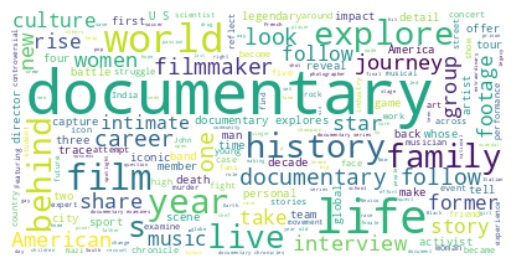

In [231]:
# key content in cluster 4
kmeans_wordcloud(4)

In [232]:
netflix_df[netflix_df['clustering_label']==4].sample(8)[['title','rating','listed_in']]

title        rating  \
2195                         Fittest in Dubai  Young Adults   
3554                    Le serment des Hitler    Older Kids   
6720  The Old Thieves: The Legend of Artegios        Adults   
5149      ReMastered: Massacre at the Stadium        Adults   
4229                         Mortified Nation        Adults   
2838        How the Beatles Changed the World    Older Kids   
5467        Secrets of Althorp - The Spencers    Older Kids   
2065                         Expedition China          Kids   

                                              listed_in  
2195  Documentaries, International Movies, Sports Mo...  
3554                Documentaries, International Movies  
6720                Documentaries, International Movies  
5149                    Documentaries, Music & Musicals  
4229                                      Documentaries  
2838                    Documentaries, Music & Musicals  
5467                Documentaries, International Movies  
2065                                      Documentaries

From the above wordcloud for cluster 4, we see that frequent words include words like **documentary, history, life** We also looked into the ratings and genre of the movies and shows which belong to cluster 4, from these two and wordcloud we can conclude that **most of the movies and shows in this cluster are documentary based movies and shows.**

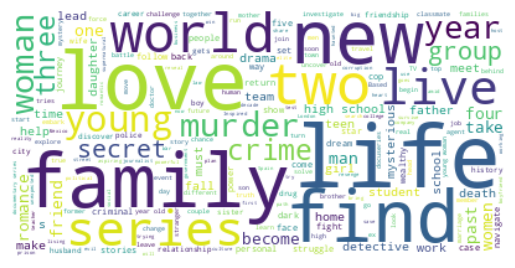

In [233]:
# key content in cluster 5
kmeans_wordcloud(5)

In [234]:
netflix_df[netflix_df['clustering_label']==5].sample(8)[['title','rating','listed_in']]

title        rating  \
5528                     Sexy Central        Adults   
2461                           Goedam        Adults   
6330     The End of the F***ing World        Adults   
1125                            Buddi          Kids   
6941  The Trials of Gabriel Fernandez        Adults   
7387                   Vampire Knight  Young Adults   
6382                         The Game  Young Adults   
4375                  Mystic Whispers  Young Adults   

                                              listed_in  
5528  International TV Shows, Romantic TV Shows, TV ...  
2461    International TV Shows, TV Horror, TV Mysteries  
6330  British TV Shows, International TV Shows, TV C...  
1125                         British TV Shows, Kids' TV  
6941                         Crime TV Shows, Docuseries  
7387  Anime Series, International TV Shows, Romantic...  
6382          Romantic TV Shows, TV Comedies, TV Dramas  
4375       International TV Shows, TV Dramas, TV Horror

From the above wordcloud for cluster 5, we see that frequent words include words like **love, life, family.** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **most of them are romantic movies and shows.**

#### KMeans Summary

In our first ML model implementation we have formed a total of 6 clusters, each of the clusters contain specific group of movies and shows.  

**Cluster 0:** This cluster contains lot of **cartoons and animes** which are for kids.  
**Cluster 1:** This cluster contains lot of **dramas, thriller and horror** movies and shows.  
**Cluster 2:** This cluster contains lot of **comedy and standup comedies**.  
**Cluster 3:** This cluster contains lot of **action and adventure movies and shows.**  
**Cluster 4:** This cluster contains lot of **documentary and docuseries.**  
**Cluster 5:** This cluster contains lot of **Romantic movies and shows.**

### **Hierarchial clustering**

In [235]:
# plotting dendogram to determine optimum clusters

Z = linkage(X_pca, method='ward')


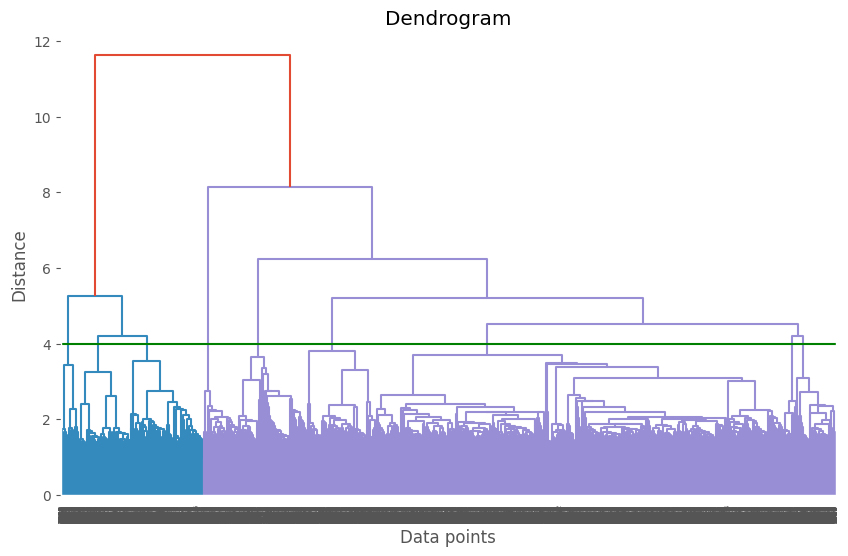

In [236]:
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.axhline(y=4,color='green')
plt.title('Dendrogram')
plt.show()

From the Dendogram above the **we see that at distance=4 seems to be optimal cut point**, and we get a total of **9 clusters** based on that cut point.

In [237]:
# implementing agglomerative clustering

agg_model = AgglomerativeClustering(n_clusters=9, linkage='ward', affinity='euclidean')
agg_model.fit(X_pca)

AgglomerativeClustering(affinity='euclidean', n_clusters=9)

In [238]:
agg_model.labels_
netflix_df['hierc_cluster_label']=agg_model.labels_
netflix_df.sample(5)

show_id     type                         title                 director  \
1180   s1181  TV Show                Call My Agent!                            
3269   s3270  TV Show                         Kaçak                            
4399   s4400    Movie  Naomi and Ely's No Kiss List            KristinHanggi   
4034   s4035    Movie                        Menahi              AymanMakram   
6833   s6834    Movie                  The Roommate  ChristianE.Christiansen   

                                                   cast        country  \
1180  CamilleCottin, ThibaultDeMontalembert, Grégory...         France   
3269  GürkanUygun, MustafaAvkıran, BerkHakman, Begüm...         Turkey   
4399  VictoriaJustice, PiersonFode, MatthewDaddario,...  United States   
4034  FayezAl-Malki, MonaWasef, AbdelImamAbdullah, R...   Saudi Arabia   
6833  LeightonMeester, MinkaKelly, CamGigandet, AlyM...  United States   

     date_added  release_year        rating   duration  \
1180 2019-01-04          2018        Adults  3 Seasons   
3269 2016-12-26          2013  Young Adults   1 Season   
4399 2015-11-18          2015        Adults     91 min   
4034 2020-06-11          2008  Young Adults    101 min   
6833 2020-04-01          2011         Teens     91 min   

                                              listed_in  \
1180     International TV Shows, TV Comedies, TV Dramas   
3269  Crime TV Shows, International TV Shows, TV Act...   
4399                     Comedies, Dramas, LGBTQ Movies   
4034                     Comedies, International Movies   
6833                                          Thrillers   

                                            description month_added  \
1180  At a top Paris talent firm, agents scramble to...     January   
3269  A cop who killed a mobster's son and fled to a...    December   
4399  Naomi and her gay best friend, Ely, have been ...    November   
4034  A stranger to civilian life, a young Saudi far...        June   
6833  While acclimating to campus life, college fres...       April   

      year_added                                      combined_text  \
1180        2019  camillecottin thibaultdemontalembert grégorymo...   
3269        2016  gürkanuygun mustafaavkıran berkhakman begümbir...   
4399        2015  kristinhanggi victoriajustice piersonfode matt...   
4034        2020  aymanmakram fayezalmalki monawasef abdelimamab...   
6833        2020  christianechristiansen leightonmeester minkake...   

      clustering_label  hierc_cluster_label  
1180                 5                    7  
3269                 5                    3  
4399                 1                    2  
4034                 1                    3  
6833                 1                    2

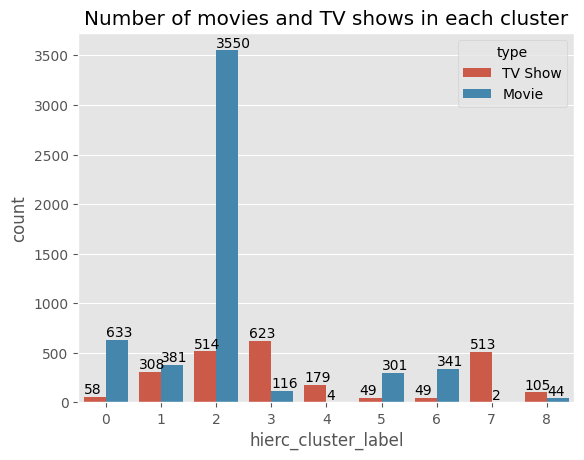

In [239]:
bars=sns.countplot(x='hierc_cluster_label',data=netflix_df,hue='type')
plt.title("Number of movies and TV shows in each cluster")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 30, format(yval,'.0f'))

1. First we have found our optimal number of clusters which is 9.  
2. After first step we have implemented **agglomerative clustering with ward linkage.**
3. We have plotted the distribution of movies and tv shows for each of these clusters.  

In [240]:
def hierachial_wordcloud(cluster_num):
  content_df=netflix_df[netflix_df['hierc_cluster_label']==cluster_num]['description']
  description_words=[]
  for text in content_df:
    for words in text.split():
      description_words.append(words)

  new_text=' '.join(description_words)
  word_cloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(new_text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


#### **Looking to understand the content present in the clusters**

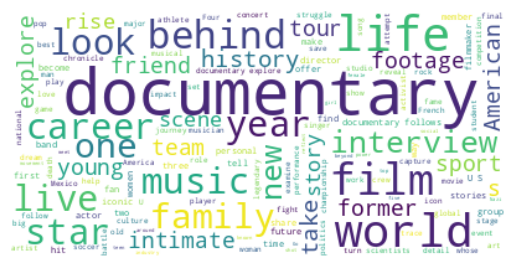

In [241]:
# key content in cluster 0
hierachial_wordcloud(0)

In [242]:
netflix_df[netflix_df['hierc_cluster_label']==0].sample(8)[['title','rating','listed_in']]

title        rating  \
5151           ReMastered: The Miami Showband Massacre        Adults   
1359  Christiane Amanpour: Sex & Love Around the World        Adults   
5470     Secrets of Henry VIII's Palace: Hampton Court    Older Kids   
25                                            (T)ERROR        Adults   
4128                                          Mischief    Older Kids   
2653                    Haunters: The Art of the Scare        Adults   
1544                                          Cristina  Young Adults   
935                                            Birders          Kids   

                                   listed_in  
5151         Documentaries, Music & Musicals  
1359                              Docuseries  
5470     Documentaries, International Movies  
25                             Documentaries  
4128  Comedies, Dramas, International Movies  
2653            Documentaries, Horror Movies  
1544                           Documentaries  
935      Documentaries, International Movies

From the above wordcloud for cluster 0, we see that frequent words include words like **documentary, world, career, life** We also looked into the ratings and genre of the movies and shows which belong to cluster 0, from these two and wordcloud we can conclude that **most of them are documentary or docuseries.**

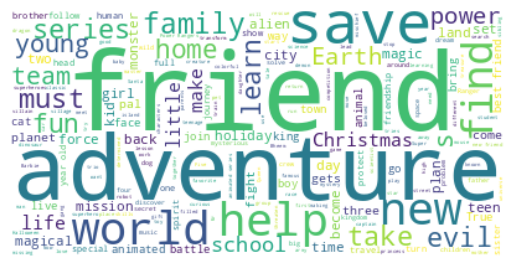

In [243]:
# key content in cluster 1
hierachial_wordcloud(1)

In [244]:
netflix_df[netflix_df['hierc_cluster_label']==1].sample(8)[['title','rating','listed_in']]

title      rating  \
480                                          Amrapali  Older Kids   
167                               A Fairly Odd Summer  Older Kids   
4548                                     Numberblocks        Kids   
3546                   Latte and the Magic Waterstone        Kids   
3588  LEGO Marvel Super Heroes: Avengers Reassembled!  Older Kids   
746                Barbie: The Princess & the Popstar        Kids   
1769                                    Dinosaur King  Older Kids   
1327         Chico Bon Bon and the Very Berry Holiday        Kids   

                                           listed_in  
480   Dramas, International Movies, Music & Musicals  
167               Children & Family Movies, Comedies  
4548                                        Kids' TV  
3546              Children & Family Movies, Comedies  
3588                        Children & Family Movies  
746                         Children & Family Movies  
1769                          Anime Series, Kids' TV  
1327                        Children & Family Movies

From the above wordcloud for cluster 1, we see that frequent words include words like **friend, adventure, world, save, find** We also looked into the ratings and genre of the movies and shows which belong to cluster 1, from these two and wordcloud we can conclude that **most of them are cartoons and animes for kids**

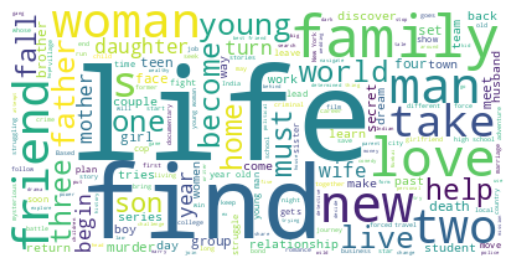

In [245]:
# key content in cluster 2
hierachial_wordcloud(2)

In [246]:
netflix_df[netflix_df['hierc_cluster_label']==2].sample(8)[['title','rating','listed_in']]

title      rating  \
2691                                           Hellboy       Teens   
6299                                    The Diabolical      Adults   
5580                                     Short Term 12      Adults   
7322                                   Uncertain Glory      Adults   
4823                               People You May Know      Adults   
1095                                    Brews Brothers      Adults   
1520                            Crazy Awesome Teachers  Older Kids   
1380  ChuChuTV Surprise Eggs Learning Videos (English)        Kids   

                                              listed_in  
2691  Action & Adventure, Cult Movies, Sci-Fi & Fantasy  
6299         Horror Movies, Sci-Fi & Fantasy, Thrillers  
5580                         Dramas, Independent Movies  
7322                       Dramas, International Movies  
4823                               Dramas, LGBTQ Movies  
1095                                        TV Comedies  
1520             Comedies, Dramas, International Movies  
1380                           Children & Family Movies

From the above wordcloud for cluster 2, we see that frequent words include words like **love, life, family, find, man, women.** We also looked into the ratings and genre of the movies and shows which belong to cluster 2, from these two and wordcloud we can conclude that **it is a mixture of comedy, drama, family, documentary**. It basically contains movies and shows which are related to **life and family**.

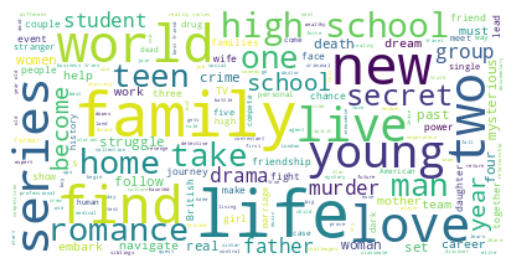

In [247]:
# key content in cluster 3
hierachial_wordcloud(3)

In [248]:
netflix_df[netflix_df['hierc_cluster_label']==3].sample(8)[['title','rating','listed_in']]

title        rating  \
5623         Sing On! Spain          Kids   
6087          The Apartment    Older Kids   
5818             Still Game  Young Adults   
2461                 Goedam        Adults   
1298                  Cheer        Adults   
1299            Cheer Squad    Older Kids   
6950             The Tudors        Adults   
3014  Inside The Freemasons        Adults   

                                              listed_in  
5623  International TV Shows, Reality TV, Spanish-La...  
6087                 International TV Shows, Reality TV  
5818   British TV Shows, Classic & Cult TV, TV Comedies  
2461    International TV Shows, TV Horror, TV Mysteries  
1298              Docuseries, Reality TV, Teen TV Shows  
1299                          Reality TV, Teen TV Shows  
6950                                          TV Dramas  
3014  British TV Shows, Docuseries, International TV...

From the above wordcloud for cluster 3, we see that frequent words include words like **life, family, high school, love, world** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **this cluster in majority contains movies and shows about things around high school stuff more for teens and young adults.**

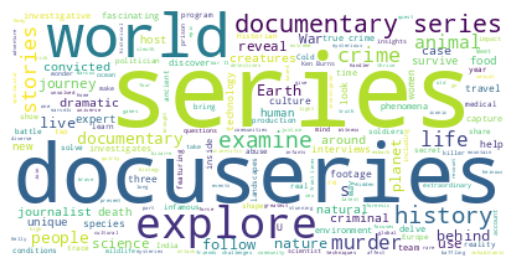

In [249]:
# key content in cluster 4
hierachial_wordcloud(4)

In [250]:
netflix_df[netflix_df['hierc_cluster_label']==4].sample(8)[['title','rating','listed_in']]

title      rating  \
5525                   Sex, Explained      Adults   
768              Battlefield Recovery  Older Kids   
4696                       Our Planet  Older Kids   
3069            Islands of the Future  Older Kids   
2299                    Frozen Planet  Older Kids   
6941  The Trials of Gabriel Fernandez      Adults   
4429    NATURE: Natural Born Hustlers        Kids   
2987       India: Nature's Wonderland  Older Kids   

                                              listed_in  
5525                    Docuseries, Science & Nature TV  
768            British TV Shows, Docuseries, Reality TV  
4696                    Docuseries, Science & Nature TV  
3069  Docuseries, International TV Shows, Science & ...  
2299  British TV Shows, Docuseries, International TV...  
6941                         Crime TV Shows, Docuseries  
4429                    Docuseries, Science & Nature TV  
2987  British TV Shows, Docuseries, Science & Nature TV

From the above wordcloud for cluster 4, we see that frequent words include words like **documentary and docuseries.** We also looked into the ratings and genre of the movies and shows which belong to cluster 4, from these two and wordcloud we can conclude that **most of them are docuseries more based towards nature.**

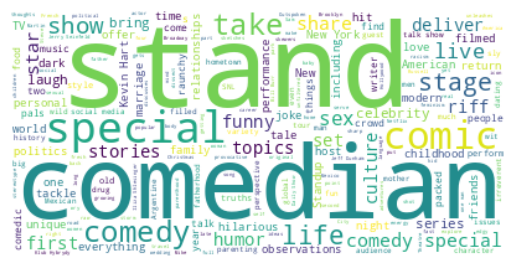

In [251]:
# key content in cluster 5
hierachial_wordcloud(5)

In [252]:
netflix_df[netflix_df['hierc_cluster_label']==5].sample(8)[['title','rating','listed_in']]

title        rating  \
4506  Norm Macdonald: Hitler's Dog, Gossip & Trickery        Adults   
1926                     Edoardo Ferrario: Temi Caldi        Adults   
5195                  Ricardo O'Farrill Abrazo Genial        Adults   
2598                           Hannah Gadsby: Douglas        Adults   
3327                  Kavin Jay: Everybody Calm Down!        Adults   
848                       Bert Kreischer: The Machine        Adults   
3171                             Jim Jefferies : BARE        Adults   
4090        Mike Birbiglia: My Girlfriend's Boyfriend  Young Adults   

            listed_in  
4506  Stand-Up Comedy  
1926  Stand-Up Comedy  
5195  Stand-Up Comedy  
2598  Stand-Up Comedy  
3327  Stand-Up Comedy  
848   Stand-Up Comedy  
3171  Stand-Up Comedy  
4090  Stand-Up Comedy

From the above wordcloud for cluster 5, we see that frequent words include words like **comic, comedian, stand up** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **this cluster majorly contains comedy movies and shows.**

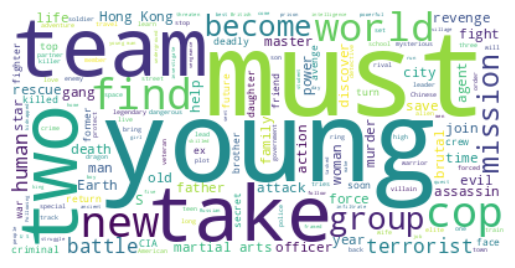

In [253]:
# key content in cluster 6
hierachial_wordcloud(6)

In [254]:
netflix_df[netflix_df['hierc_cluster_label']==6].sample(8)[['title','rating','listed_in']]

title        rating  \
4566                                      OCTB  Young Adults   
5322                                  S.W.A.T.         Teens   
1396  Cirque du Freak: The Vampire's Assistant         Teens   
1787                          Django Unchained        Adults   
4824                                Peppermint        Adults   
1037                         Bon Cop Bad Cop 2        Adults   
3421                                Knightfall        Adults   
2949                  Illang: The Wolf Brigade        Adults   

                                              listed_in  
4566  Crime TV Shows, International TV Shows, TV Dramas  
5322                                 Action & Adventure  
1396  Action & Adventure, Horror Movies, Sci-Fi & Fa...  
1787                         Action & Adventure, Dramas  
4824                                 Action & Adventure  
1037  Action & Adventure, Comedies, International Mo...  
3421                                          TV Dramas  
2949  Action & Adventure, International Movies, Sci-...

From the above wordcloud for cluster 5, we see that frequent words include words like **team, young, must** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **this cluster in majority contains action and adventure movies and shows.**

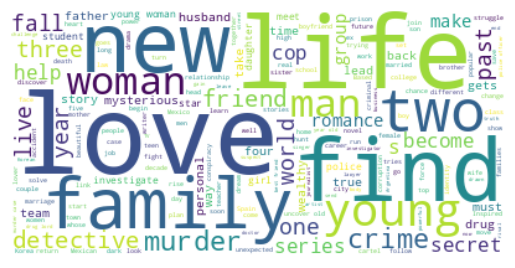

In [255]:
# key content in cluster 7
hierachial_wordcloud(7)

In [256]:
netflix_df[netflix_df['hierc_cluster_label']==7].sample(8)[['title','rating','listed_in']]

title        rating  \
7076            Tientsin Mystic  Young Adults   
1463            College Romance        Adults   
6587                The Letdown        Adults   
5822                Stolen Away        Adults   
1437              Club of Crows        Adults   
2058          Exclusive Edition  Young Adults   
1021  Boca Juniors Confidential    Older Kids   
720           Bangkok Bachelors        Adults   

                                              listed_in  
7076  Crime TV Shows, International TV Shows, TV Dramas  
1463  International TV Shows, Romantic TV Shows, TV ...  
6587     International TV Shows, TV Comedies, TV Dramas  
5822  Crime TV Shows, International TV Shows, Spanis...  
1437  International TV Shows, Spanish-Language TV Sh...  
2058                  International TV Shows, TV Dramas  
1021  Docuseries, International TV Shows, Spanish-La...  
720   International TV Shows, Romantic TV Shows, TV ...

From the above wordcloud for cluster 6, we see that frequent words include words like **love, life, find.** We also looked into the ratings and genre of the movies and shows which belong to cluster 6, from these two and wordcloud we can conclude that **most of the, are romantic movies and shows.**

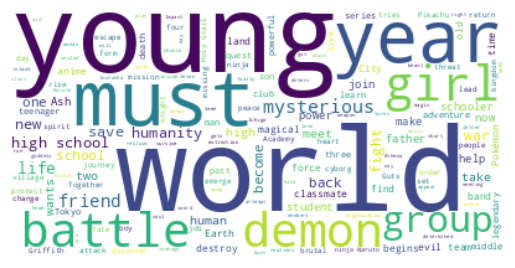

In [257]:
# key content in cluster 8
hierachial_wordcloud(8)

In [258]:
netflix_df[netflix_df['hierc_cluster_label']==8].sample(8)[['title','rating','listed_in']]

title        rating  \
516                                        Angel Beats!    Older Kids   
3279  Kabaneri of the Iron Fortress: The Battle of U...        Adults   
975                        Bleach the Movie: Hell Verse  Young Adults   
2458                                           Godzilla  Young Adults   
4404                                             Naruto  Young Adults   
5863             Sturgill Simpson Presents Sound & Fury        Adults   
2576                                           Haikyu!!  Young Adults   
6005                          Teasing Master Takagi-san    Older Kids   

                                              listed_in  
516                Anime Series, International TV Shows  
3279    Anime Series, International TV Shows, TV Horror  
975   Action & Adventure, Anime Features, Sci-Fi & F...  
2458                                           TV Shows  
4404               Anime Series, International TV Shows  
5863  Anime Features, Music & Musicals, Sci-Fi & Fan...  
2576  Anime Series, International TV Shows, Teen TV ...  
6005  Anime Series, International TV Shows, Romantic...

From the above wordcloud for cluster 8, we see that frequent words include words like **young, world, demon, girl.** We also looked into the ratings and genre of the movies and shows which belong to cluster 8, from these two and wordcloud we can conclude that **this cluster in majority contains anime series and movies.**

### **Hierarchial clustering summary**

In Agglomerative clustering implementation we have formed a total of 9 clusters, each of the clusters contain specific group of movies and shows.  

**Cluster 0:** This cluster contains lot of **documentary movies**.  
**Cluster 1:** This cluster contains lot of **cartoon and animes** for kids.  
**Cluster 2:** This cluster contains movies and tv shows which focuses about **life and family.**  
**Cluster 3:** This cluster contains **high school drama and thriller**.  
**Cluster 4:** This cluster contains lot of **documentary and docuseries based on crime**.  
**Cluster 5:** This cluster contains lot of **Comedy movies and shows**.   
**Cluster 6:** This cluster contains lot of **Action and Adventure movies.**   
**Cluster 7:** This cluster contains **romantic movies and tv shows.**

### **Recommendation system**

* In Recommendation system we input one movie and it will recommend 10 similar movies or tv shows to our input movie, we use **Content based recommendation** system and use **cosine similarlity** to compute similarity scores between two items.  

* Here we will build a recommender system which will recommend 10 similar movies or shows to our input movie.

In [259]:
recommender_df=netflix_df.copy()

In [260]:
recommender_df['combined_text']

0       joãomiguel biancacomparato michelgomes rodolfo...
1       jorgemichelgrau demiánbichir héctorbonilla osc...
2       gilbertchan teddchan stellachung henleyhii law...
3       shaneacker elijahwood johncreilly jenniferconn...
4       robertluketic jimsturgess kevinspacey katebosw...
                              ...                        
7782    joseffares imadcreidi antoinetteturk eliasgerg...
7783    mozezsingh vickykaushal sarahjanedias raaghavc...
7784    nastyc adults documentaries international movi...
7785    adrianozumbo rachelkhoo older kid internationa...
7786    samdunn adults documentaries music musicals do...
Name: combined_text, Length: 7770, dtype: object

In [261]:
recommender_df.shape

(7770, 17)

In [262]:
recommender_df=recommender_df[['title','combined_text']]
recommender_df.head()

title                                      combined_text
0     3%  joãomiguel biancacomparato michelgomes rodolfo...
1   7:19  jorgemichelgrau demiánbichir héctorbonilla osc...
2  23:59  gilbertchan teddchan stellachung henleyhii law...
3      9  shaneacker elijahwood johncreilly jenniferconn...
4     21  robertluketic jimsturgess kevinspacey katebosw...

In [263]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim=cosine_similarity(X_pca)
print(cosine_sim)

[[ 1.00000000e+00 -2.02620208e-02  4.16812593e-02 ... -2.65680852e-02
   3.12928777e-02 -2.68525007e-02]
 [-2.02620208e-02  1.00000000e+00  1.25198540e-03 ...  5.09074310e-02
  -2.33922522e-02 -7.36697054e-03]
 [ 4.16812593e-02  1.25198540e-03  1.00000000e+00 ...  1.57588276e-04
   1.08114201e-03 -1.10721199e-02]
 ...
 [-2.65680852e-02  5.09074310e-02  1.57588276e-04 ...  1.00000000e+00
  -2.04143843e-02  2.28408537e-01]
 [ 3.12928777e-02 -2.33922522e-02  1.08114201e-03 ... -2.04143843e-02
   1.00000000e+00  3.81670962e-02]
 [-2.68525007e-02 -7.36697054e-03 -1.10721199e-02 ...  2.28408537e-01
   3.81670962e-02  1.00000000e+00]]


In [264]:
cosine_sim.shape

(7770, 7770)

In [265]:
recommender_df.reset_index(inplace=True)

In [266]:
def recommend_movies(movie):
  try:
    index=recommender_df.loc[recommender_df['title'].str.lower()== movie.lower()].index[0]
    similar_movies=cosine_sim[index]
    similar_movies_ind=np.argsort(similar_movies)[::-1]
    similar_movies_index=similar_movies_ind[1:11]
    recommended_movies=recommender_df.loc[similar_movies_index,'title']
    print(f'If you liked {movie} you may like :')
    print()
    for movies in recommended_movies:
      print(movies)
  except:
    print('invalid entry')


In [267]:
recommend_movies('Narcos')

If you liked Narcos you may like :

Narcos: Mexico
The Great Heist
Wild District
El Cartel
El Chapo
Enemigo íntimo
Apaches
Miss Dynamite
El señor de los Cielos
El Cartel 2


In [268]:
recommend_movies('The Vampire Diaries')

If you liked The Vampire Diaries you may like :

Transfers
The Originals
The Roommate
Switched
Vampires
Warrior Nun
The Little Vampire
Immortals
Scissor Seven
Skin Wars


In [269]:
recommend_movies("Breaking Bad")

If you liked Breaking Bad you may like :

Better Call Saul
Have You Ever Fallen in Love, Miss Jiang?
The Show
Extracurricular
The Mess You Leave Behind
Marvel's The Punisher
The Lies Within
The Underclass
Ex-Boyfriend
Iron Ladies


In [270]:
recommend_movies('Bad Boys')

If you liked Bad Boys you may like :

Bad Boys II
Dollar
Operation Odessa
Merantau
Slow West
A Thin Line Between Love & Hate
Kung Fu Yoga
Mile 22
War on Everyone
Santana


# **Conclusion**

* In this project, we worked on a **text clustering problem** wherein we had to group the Netflix shows into **certain clusters** such that the shows within a cluster are similar to each other and the shows in different clusters are not similar to each other.   
* The dataset contained about **7787 records**, and **12 attributes**.  
* We first did a bit of data wrangling after that we did exploratory data analysis (EDA) using various visualization.  
* It was found that Netflix hosts **more movies than TV shows** on its platform, also, **majority of the shows were produced in the United States**, and the **majority of the shows on Netflix were created for adults and young adults age group**.  
* It was decided to cluster the data based on the attributes: **director, cast, country, genre, and description.** The values in these attributes were tokenized, preprocessed, and then **vectorized using TFIDF vectorizer.**  
* Through TFIDF Vectorization, we created a total of **10000 attributes**.  
* We used **Principal Component Analysis (PCA)** to handle the curse of dimensionality. **3000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 3000.**   
* We first built clusters using the **k-means clustering algorithm**, and the optimal number of clusters **came out to be 6**. This was obtained through the **elbow method and Silhouette score** analysis.  
* Then clusters were built using the **Agglomerative clustering algorithm**, and the **optimal number of clusters came out to be 9**. This was obtained after visualizing the **dendrogram.**  
* A **content based recommender system** was built using the **similarity matrix** obtained after using **cosine similarity**. This recommender system will make **10 recommendations** to the user based on the type of show they watched.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***